D:\OneDrive - Cardiff University\05 - Python\08 - National Grid
D:
OneDrive - Cardiff University
05 - Python
08 - National Grid
D:\


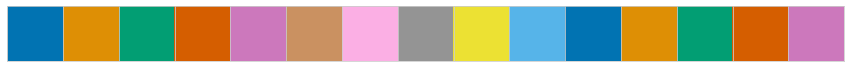

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys
import geopandas as gpd
import datetime as dt
import csv

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
fig_format = "png"
dpi = 600
figsize = (12, 3.5)
figsize_map = (16, 8)
sns.palplot(sns.color_palette())

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "sceac10":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)

sys.path.append(computer_path + r"OneDrive - Cardiff University/05 - Python/01 - Packages/Functions")

import profiles as pr
import functions

In [2]:
path_save_paper = r"D:\Cardiff University\National Grid Project - General\Paper"

In [3]:
## get lookup table of local authority

path = r"D:\OneDrive - Cardiff University\04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data\Lookup tables"
OA_lookup_file = r"Postcode to OA LSOA MSOA LAD\PCD11_OA11_LSOA11_MSOA11_LAD11_EW_LU_feb_2018.csv"
OA_lookup_df = pd.read_csv(path+os.path.sep+OA_lookup_file, low_memory=False)
OA_lookup_df.drop(["pcd8", "pcds", "dointr", "doterm", "usertype", "lsoa11nm", "msoa11nm","ladnmw", "FID"], axis=1, inplace=True) 
OA_lookup_df.drop_duplicates(inplace=True)

region_lookup_file = r"laregionlookup376las.xls"
region_lookup_df = pd.read_excel(path+os.path.sep+region_lookup_file, sheet_name=1, header=6, usecols=[0, 1, 3])

OA_lookup_df = pd.merge(OA_lookup_df, region_lookup_df, left_on='ladcd', right_on='la_code', how='left')

OA_lookup_df = pd.merge(OA_lookup_df, region_lookup_df, left_on='ladnm', right_on='la_name', how='left')
OA_lookup_df["la_code_x"].fillna(OA_lookup_df["la_code_y"], inplace=True)
OA_lookup_df["la_name_x"].fillna(OA_lookup_df["la_name_y"], inplace=True)
OA_lookup_df["region_name_x"].fillna(OA_lookup_df["region_name_y"], inplace=True)
OA_lookup_df.drop(["ladcd", "ladnm", "la_code_y","la_name_y", "region_name_y"], axis=1, inplace=True)
OA_lookup_df.dropna(subset=["la_name_x"], inplace=True)
OA_lookup_df["pcd7"]=OA_lookup_df["pcd7"].str.replace(' ','')
OA_lookup_df.columns = ['PCD7', 'OA11CD', 'LSOA11CD', 'MSOA11CD', 'LAD11CD', 'Local Authority', 'Region']

OA_lookup_df = OA_lookup_df[["OA11CD", "Local Authority"]].drop_duplicates()

OA_lookup_2019_file = "Output_Area_to_Ward_to_Local_Authority_District_(December_2019)_Lookup_in_England_and_Wales.csv"
OA_lookup_2019_df = pd.read_csv(path+os.path.sep+OA_lookup_2019_file, low_memory=False)
OA_lookup_df=pd.merge(OA_lookup_df, OA_lookup_2019_df[["OA11CD", "LAD19NM"]], left_on="OA11CD", right_on="OA11CD", how="left")

LA_lookup_dict = dict(zip(OA_lookup_df["Local Authority"], OA_lookup_df["LAD19NM"]))

In [4]:
path = computer_path + r"OneDrive - Cardiff University\04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data"

full_path = path+os.path.sep
fn = "Potential_England_Wales_2018.csv"
potential_dataset = pd.read_csv(full_path+os.path.sep+fn, low_memory=False, index_col=0)
potential_dataset.columns = [c.replace("Solid fuel", "Biomass") for c in potential_dataset.columns]
potential_dataset.sort_index(inplace=True)
print(potential_dataset.shape)
potential_dataset.head()



(34753, 483)


,index,N_Households 2011,Owned; Owned Outright,Owned; Owned with a Mortgage or Loan,Shared Ownership (Part Owned and Part Rented),Social Rented; Total,Social Rented; Rented from Council (Local Authority),Social Rented; Other Social Rented,Private Rented; Total,Private Rented; Private Landlord or Letting Agency,...,Heat from non-domestic oil 2018 (kWh),Heat from non-domestic DH 2018 (kWh),Total domestic gas consumption 2017 (kWh),Total number of domestic gas meters 2017,Mean domestic gas consumption 2017 (kWh per meter),Median domestic gas consumption 2017 (kWh per meter),Heat from gas 2017 (kWh) - method 2,Mean heat from gas 2017 (kWh) - method 2,Heat from gas 2018 (kWh) - method 2,Population 2018
LSOA11CD,,,,,,,,,,,,,,,,,,,,,
E01000001,0,876,355,178,3,41,33,8,264,247,...,NaN,NaN,6.200870e+05,57.0,10878.720040,4124.629080,5.078513e+05,8909.671713,5.524953e+05,1480
E01000002,1,830,314,213,8,48,44,4,219,206,...,NaN,NaN,4.154411e+05,21.0,19782.911780,8758.654797,3.402463e+05,16202.204748,3.843362e+05,1451
E01000003,2,817,184,143,1,295,239,56,177,166,...,NaN,NaN,4.151884e+06,565.0,7348.467740,6783.382789,3.400393e+06,6018.395079,3.411112e+06,1612
E01000005,3,467,24,22,0,312,133,179,101,92,...,NaN,NaN,2.842432e+06,457.0,6219.764213,3553.907023,2.327952e+06,5093.986890,2.348228e+06,1728
E01000006,4,543,136,209,0,18,11,7,178,163,...,NaN,NaN,6.453118e+06,408.0,15816.464960,15394.658750,5.285103e+06,12953.684802,5.256443e+06,2066


In [5]:
full_path = path+os.path.sep
fn = "Current_England_Wales_2018.csv"
current_dataset = pd.read_csv(full_path+os.path.sep+fn, low_memory=False, index_col=0)
current_dataset.columns = [c.replace("Solid fuel", "Biomass") for c in current_dataset.columns]
current_dataset.sort_index(inplace=True)
print(current_dataset.shape)
current_dataset.head()

(34753, 539)


,index,N_Households 2011,Owned; Owned Outright,Owned; Owned with a Mortgage or Loan,Shared Ownership (Part Owned and Part Rented),Social Rented; Total,Social Rented; Rented from Council (Local Authority),Social Rented; Other Social Rented,Private Rented; Total,Private Rented; Private Landlord or Letting Agency,...,Heat from non-domestic oil 2018 (kWh),Heat from non-domestic DH 2018 (kWh),Total domestic gas consumption 2017 (kWh),Total number of domestic gas meters 2017,Mean domestic gas consumption 2017 (kWh per meter),Median domestic gas consumption 2017 (kWh per meter),Heat from gas 2017 (kWh) - method 2,Mean heat from gas 2017 (kWh) - method 2,Heat from gas 2018 (kWh) - method 2,Population 2018
LSOA11CD,,,,,,,,,,,,,,,,,,,,,
E01000001,0,876,355,178,3,41,33,8,264,247,...,NaN,NaN,6.200870e+05,57.0,10878.720040,4124.629080,5.078513e+05,8909.671713,5.524953e+05,1480
E01000002,1,830,314,213,8,48,44,4,219,206,...,NaN,NaN,4.154411e+05,21.0,19782.911780,8758.654797,3.402463e+05,16202.204748,3.843362e+05,1451
E01000003,2,817,184,143,1,295,239,56,177,166,...,NaN,NaN,4.151884e+06,565.0,7348.467740,6783.382789,3.400393e+06,6018.395079,3.411112e+06,1612
E01000005,3,467,24,22,0,312,133,179,101,92,...,NaN,NaN,2.842432e+06,457.0,6219.764213,3553.907023,2.327952e+06,5093.986890,2.348228e+06,1728
E01000006,4,543,136,209,0,18,11,7,178,163,...,NaN,NaN,6.453118e+06,408.0,15816.464960,15394.658750,5.285103e+06,12953.684802,5.256443e+06,2066


In [6]:
# Calculate building and demand for 2018

In [7]:
def get_number_heat_pumps(df, heating_cols):

    #all oil/solid fuel boilers are replaced by HP by 2030
    #all resistance heaters converted to HP
    cols = []
    
    for target in heating_cols:
        # Store the number of dwellings switched to HP (the dwellings not connected to connected to DH)
        target = target+" 2018"
        if "Oil" in target or "Biomass" in target:
            df[target[:-5]+ " to HP"]=df[target] #all oil/solid fuel boilers are replaced by HP by 2030
        elif "Resistance" in target:
            df[target[:-5]+ " to HP"]= df[target]
        else:
            df[target[:-5]+ " to HP"]= 0

        #for detached and semi-detached, a 1/7 ratio is assumed between GSHP/ASHP
        if ("Detached" in target) | ("Semi-detached" in target):
            df[target[:-5]+ " to ASHP"] = round(df[target[:-5]+ " to HP"]*7/8, 0)
            df[target[:-5]+ " to GSHP"] = df[target[:-5]+ " to HP"]-df[target[:-5]+ " to ASHP"]
        else:
            df[target[:-5]+ " to ASHP"] = df[target[:-5]+ " to HP"]
            df[target[:-5]+ " to GSHP"] = 0
            
            
            cols.append(target[:-5]+ " to ASHP")
            cols.append(target[:-5]+ " to GSHP")
    return df, cols


In [8]:
current_categories = ['Detached Gas boiler' ,
                        'Detached Resistance heating' ,
                        'Detached Oil boiler' ,
                        'Detached Biomass boiler' ,
                        'Semi-detached Gas boiler' ,
                        'Semi-detached Resistance heating' ,
                        'Semi-detached Oil boiler' ,
                        'Semi-detached Biomass boiler' ,
                        'Terraced Gas boiler' ,
                        'Terraced Resistance heating' ,
                        'Terraced Oil boiler' ,
                        'Terraced Biomass boiler' ,
                        'Flat Gas boiler' ,
                        'Flat Resistance heating' ,
                        'Flat Oil boiler' ,
                        'Flat Biomass boiler' ]

In [9]:
## check data

[Text(1, 0, 'Detached Gas boiler 2018'),
 Text(2, 0, 'Detached Resistance heating 2018'),
 Text(3, 0, 'Detached Oil boiler 2018'),
 Text(4, 0, 'Detached Biomass boiler 2018'),
 Text(5, 0, 'Semi-detached Gas boiler 2018'),
 Text(6, 0, 'Semi-detached Resistance heating 2018'),
 Text(7, 0, 'Semi-detached Oil boiler 2018'),
 Text(8, 0, 'Semi-detached Biomass boiler 2018'),
 Text(9, 0, 'Terraced Gas boiler 2018'),
 Text(10, 0, 'Terraced Resistance heating 2018'),
 Text(11, 0, 'Terraced Oil boiler 2018'),
 Text(12, 0, 'Terraced Biomass boiler 2018'),
 Text(13, 0, 'Flat Gas boiler 2018'),
 Text(14, 0, 'Flat Resistance heating 2018'),
 Text(15, 0, 'Flat Oil boiler 2018'),
 Text(16, 0, 'Flat Biomass boiler 2018')]

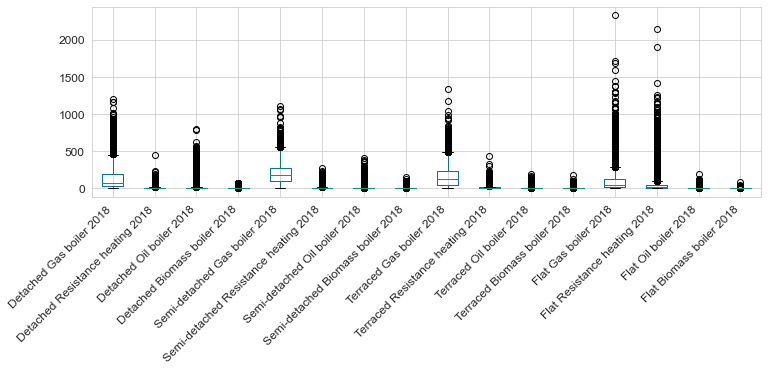

In [10]:
# number of houses by LSOA
fig, ax = plt.subplots(figsize=figsize)
columns = [c+" 2018" for c in current_categories]
current_dataset[columns].plot.box(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right' )

[Text(1, 0, 'Mean Detached Gas boiler'),
 Text(2, 0, 'Mean Detached Resistance heating'),
 Text(3, 0, 'Mean Detached Oil boiler'),
 Text(4, 0, 'Mean Detached Biomass boiler'),
 Text(5, 0, 'Mean Semi-detached Gas boiler'),
 Text(6, 0, 'Mean Semi-detached Resistance heating'),
 Text(7, 0, 'Mean Semi-detached Oil boiler'),
 Text(8, 0, 'Mean Semi-detached Biomass boiler'),
 Text(9, 0, 'Mean Terraced Gas boiler'),
 Text(10, 0, 'Mean Terraced Resistance heating'),
 Text(11, 0, 'Mean Terraced Oil boiler'),
 Text(12, 0, 'Mean Terraced Biomass boiler'),
 Text(13, 0, 'Mean Flat Gas boiler'),
 Text(14, 0, 'Mean Flat Resistance heating'),
 Text(15, 0, 'Mean Flat Oil boiler'),
 Text(16, 0, 'Mean Flat Biomass boiler')]

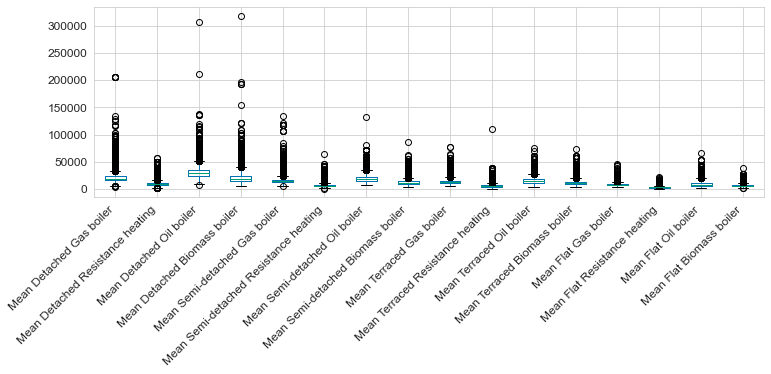

In [11]:
fig, ax = plt.subplots(figsize=figsize)
columns = ["Mean "+c for c in current_categories]
current_dataset[columns].plot.box(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right' )


[Text(1, 0, 'Mean Detached Gas boiler'),
 Text(2, 0, 'Mean Detached Resistance heating'),
 Text(3, 0, 'Mean Detached Oil boiler'),
 Text(4, 0, 'Mean Detached Biomass boiler'),
 Text(5, 0, 'Mean Semi-detached Gas boiler'),
 Text(6, 0, 'Mean Semi-detached Resistance heating'),
 Text(7, 0, 'Mean Semi-detached Oil boiler'),
 Text(8, 0, 'Mean Semi-detached Biomass boiler'),
 Text(9, 0, 'Mean Terraced Gas boiler'),
 Text(10, 0, 'Mean Terraced Resistance heating'),
 Text(11, 0, 'Mean Terraced Oil boiler'),
 Text(12, 0, 'Mean Terraced Biomass boiler'),
 Text(13, 0, 'Mean Flat Gas boiler'),
 Text(14, 0, 'Mean Flat Resistance heating'),
 Text(15, 0, 'Mean Flat Oil boiler'),
 Text(16, 0, 'Mean Flat Biomass boiler')]

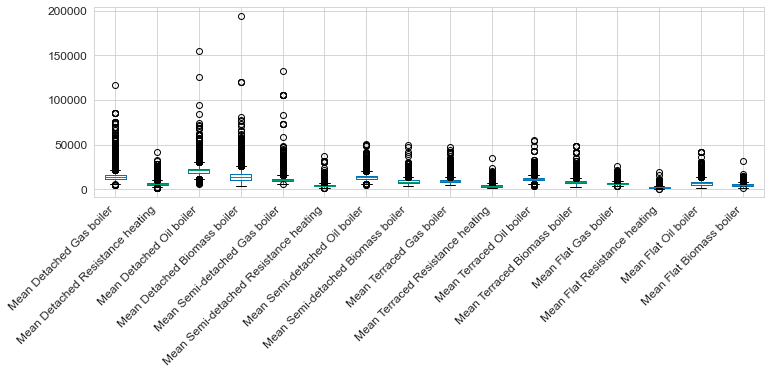

In [12]:
fig, ax = plt.subplots(figsize=figsize)
columns = ["Mean "+c for c in current_categories]
potential_dataset[columns].plot.box(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right' )

In [13]:
## Correcting data
for c in current_categories:
    quantile_99 = potential_dataset["Mean "+c].quantile(0.99)
    potential_dataset.loc[potential_dataset["Mean "+c]>quantile_99, "Mean "+c] = quantile_99
    
for c in current_categories:
    quantile_99 = current_dataset["Mean "+c].quantile(0.99)
    current_dataset.loc[current_dataset["Mean "+c]>quantile_99, "Mean "+c] = quantile_99

(0.0, 60000.0)

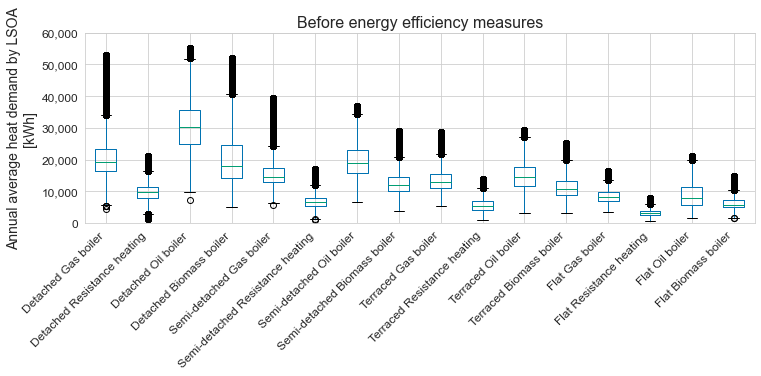

In [14]:
fig, ax = plt.subplots(figsize=(figsize[0], figsize[1]))
columns = ["Mean "+c for c in current_categories]
current_dataset[columns].plot.box(ax=ax)
ax.set_xticklabels(current_categories,rotation=45, ha='right' )
ax.set_ylabel("Annual average heat demand by LSOA\n[kWh]")
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.set_title("Before energy efficiency measures")
ax.set_ylim(0, 60000)

(0.0, 60000.0)

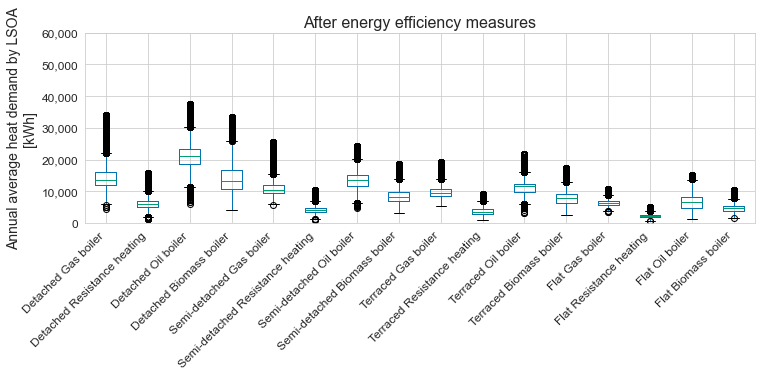

In [15]:
fig, ax = plt.subplots(figsize=(figsize[0], figsize[1]))
columns = ["Mean "+c for c in current_categories]
potential_dataset[columns].plot.box(ax=ax)
ax.set_xticklabels(current_categories,rotation=45, ha='right' )
ax.set_ylabel("Annual average heat demand by LSOA\n[kWh]")
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.set_title("After energy efficiency measures")
ax.set_ylim(0, 60000)

In [16]:
cols_demand_after = []
cols_to_keep = []
cols_to_keep = cols_to_keep

for c in current_categories:
    potential_dataset["Heat demand after energy efficiency measures for "+c.lower()+ " (kWh)"] = potential_dataset["Mean "+c]*current_dataset[c+" 2018"]
    cols_demand_after.append("Heat demand after energy efficiency measures for "+c.lower()+ " (kWh)")
potential_dataset["Total heat demand after energy efficiency measures 2018 (kWh)"] = potential_dataset[cols_demand_after].sum(axis=1)
cols_to_keep.append("Total heat demand after energy efficiency measures 2018 (kWh)")

In [17]:
rename_dict = {}
for c in current_categories:
    rename_dict["Mean "+c] = "Average heat demand after energy efficiency measures for "+c.lower()+" (kWh)"

potential_dataset.rename(columns=rename_dict, inplace=True)
cols_to_keep = cols_to_keep + [c for c in rename_dict.values()]

In [18]:
current_dataset = pd.merge(current_dataset, potential_dataset[cols_to_keep], left_index=True, right_index=True, how="left")
# current_dataset, cols_to_export = get_number_heat_pumps(current_dataset, current_categories)
# cols_to_keep = cols_to_keep + cols_to_export

In [19]:
cols_demand_before = []
for c in current_categories:
    current_dataset["Heat demand before energy efficiency measures for "+c.lower()+ " (kWh)"] = current_dataset["Mean "+c]*current_dataset[c+" 2018"]
    cols_demand_before.append("Heat demand before energy efficiency measures for "+c.lower()+ " (kWh)")
current_dataset["Total heat demand before energy efficiency measures 2018 (kWh)"] = current_dataset[cols_demand_before].sum(axis=1)
cols_to_keep.append("Total heat demand before energy efficiency measures 2018 (kWh)")

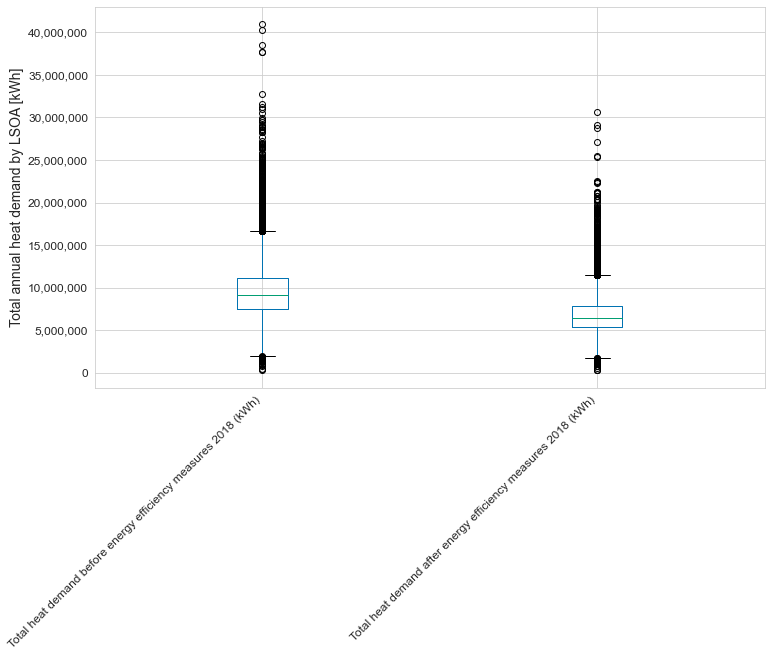

In [20]:
fig, ax = plt.subplots(figsize=(figsize[0], figsize[1]*2))
columns = ["Total heat demand before energy efficiency measures 2018 (kWh)", "Total heat demand after energy efficiency measures 2018 (kWh)"]
current_dataset[columns].plot.box(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right' )
ax.set_ylabel("Total annual heat demand by LSOA [kWh]")
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))

In [21]:
(current_dataset["Total heat demand after energy efficiency measures 2018 (kWh)"].sum()-current_dataset["Total heat demand before energy efficiency measures 2018 (kWh)"].sum())/current_dataset["Total heat demand before energy efficiency measures 2018 (kWh)"].sum()

-0.2885579512874426

In [22]:
rename_dict = {}
for c in current_categories:
    rename_dict["Mean "+c] = "Average heat demand before energy efficiency measures for "+c.lower()+" (kWh)"
current_dataset.rename(columns=rename_dict, inplace=True)

cols_to_keep = cols_to_keep + [c for c in rename_dict.values()]

In [23]:
cols_demand_before = [c for c in current_dataset.columns if "before energy efficiency measures" in c and "Average" in c]

In [24]:
temp_df = pd.DataFrame()
for c in cols_demand_before:
    key = c.split("for ")[-1][:-6]
    print(key)
    temp_df[key] = current_dataset[c] -  current_dataset[c.replace("before", "after")]

flat oil boiler
detached gas boiler
detached resistance heating
detached oil boiler
detached biomass boiler
semi-detached gas boiler
semi-detached resistance heating
semi-detached oil boiler
semi-detached biomass boiler
terraced gas boiler
terraced resistance heating
terraced oil boiler
terraced biomass boiler
flat gas boiler
flat resistance heating
flat biomass boiler


In [25]:
# for c in temp_df.columns:
#     temp_df.loc[temp_df[c]<0, c] =0 

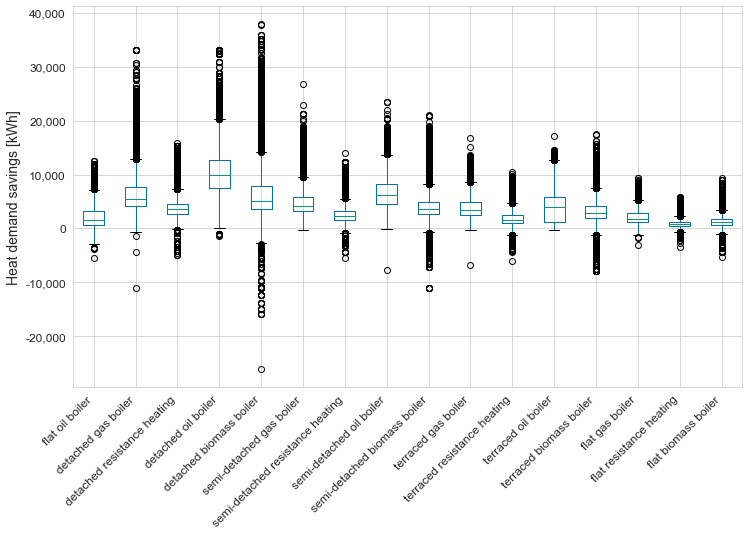

In [26]:
fig, ax = plt.subplots(figsize=(figsize[0], figsize[1]*2))
temp_df.plot.box(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right' )
ax.set_ylabel("Heat demand savings [kWh]")
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))

In [27]:
current_dataset["Rurality"].unique()

array(['Rurality_Urban >10K', 'Rurality_Village, Town and Fringe',
       'Rurality_Hamlet & Isolated Dwellings'], dtype=object)

In [28]:
cols_to_keep.append("Road length (m)")         
cols_to_keep.append("Rurality") 
cols_to_keep.append('Area (km2)') 

In [29]:
rename_dict = {}
for c in current_categories:
    rename_dict[c+" 2018"] = "Number of "+c.lower() + " in 2018"

rename_dict["Local Authority"]  = "Local Authority (2011)"
current_dataset.rename(columns=rename_dict, inplace=True)

cols_to_keep = cols_to_keep + [c for c in rename_dict.values()]
cols_to_keep = cols_to_keep + ["Local Authority (2019)"]

In [30]:
current_dataset["Local Authority (2019)"] = current_dataset["Local Authority (2011)"]
current_dataset.replace({"Local Authority (2019)":LA_lookup_dict}, inplace=True)
current_dataset[cols_to_keep]

,Total heat demand after energy efficiency measures 2018 (kWh),Average heat demand after energy efficiency measures for detached gas boiler (kWh),Average heat demand after energy efficiency measures for detached resistance heating (kWh),Average heat demand after energy efficiency measures for detached oil boiler (kWh),Average heat demand after energy efficiency measures for detached biomass boiler (kWh),Average heat demand after energy efficiency measures for semi-detached gas boiler (kWh),Average heat demand after energy efficiency measures for semi-detached resistance heating (kWh),Average heat demand after energy efficiency measures for semi-detached oil boiler (kWh),Average heat demand after energy efficiency measures for semi-detached biomass boiler (kWh),Average heat demand after energy efficiency measures for terraced gas boiler (kWh),...,Number of terraced gas boiler in 2018,Number of terraced resistance heating in 2018,Number of terraced oil boiler in 2018,Number of terraced biomass boiler in 2018,Number of flat gas boiler in 2018,Number of flat resistance heating in 2018,Number of flat oil boiler in 2018,Number of flat biomass boiler in 2018,Local Authority (2011),Local Authority (2019)
LSOA11CD,,,,,,,,,,,,,,,,,,,,,
E01000001,3.158831e+06,14630.585193,6265.609669,21185.433903,14116.369105,11233.563923,4368.213900,13640.298795,8728.723962,14994.444444,...,1.0,10.0,0.0,0.0,95.0,680.0,12.0,0.0,City of London,City of London
E01000002,3.391889e+06,14630.585193,6265.609669,21185.433903,14116.369105,11233.563923,4368.213900,13640.298795,8728.723962,14994.444444,...,4.0,32.0,0.0,0.0,50.0,717.0,8.0,0.0,City of London,City of London
E01000003,4.855578e+06,14630.585193,6265.609669,21185.433903,14116.369105,11233.563923,4368.213900,13640.298795,8728.723962,14994.444444,...,3.0,0.0,0.0,0.0,718.0,302.0,1.0,0.0,City of London,City of London
E01000005,1.771388e+06,14630.585193,6265.609669,21185.433903,14116.369105,11233.563923,4368.213900,13640.298795,8728.723962,14994.444444,...,0.0,0.0,0.0,0.0,270.0,118.0,30.0,0.0,City of London,City of London
E01000006,4.849167e+06,14481.790123,11731.940818,21185.433903,14116.369105,22443.750000,4040.778009,13640.298795,7709.785319,10346.403962,...,256.0,7.0,0.0,1.0,25.0,86.0,1.0,0.0,Barking and Dagenham,Barking and Dagenham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W01001954,8.857071e+06,17294.065657,5504.664131,23704.762312,11528.344671,15301.319444,4136.196112,14320.097294,6120.042832,14608.333333,...,37.0,1.0,0.0,0.0,77.0,70.0,0.0,0.0,Cardiff,Cardiff
W01001955,5.610404e+06,11599.494949,5902.923277,16452.012099,16439.279727,13740.555556,3216.383812,10808.847388,8363.748080,9835.648148,...,38.0,4.0,0.0,0.0,604.0,602.0,2.0,0.0,Swansea,Swansea
W01001956,8.234208e+06,11788.888889,5251.305483,16452.012099,16439.279727,10953.504274,3479.112272,10808.847388,9989.682540,7026.207729,...,92.0,19.0,0.0,0.0,86.0,11.0,0.0,1.0,Swansea,Swansea


In [31]:

# current_dataset[cols_to_keep].to_csv(full_path+os.path.sep+"Example_data_descriptor.csv")
current_dataset[sorted(cols_to_keep)].to_csv(path_save_paper+os.path.sep+"Annual_heat_demand_LSOA.csv", quotechar='"',quoting=csv.QUOTE_NONNUMERIC, encoding='utf-8-sig')


In [32]:
current_dataset.reset_index(inplace=True)

In [33]:
epc_rating_cols = [x for x in current_dataset.columns if "EPC rating" in x]
epc_rating_cols

['EPC rating A to A',
 'EPC rating B to A',
 'EPC rating C to A',
 'EPC rating D to A',
 'EPC rating E to A',
 'EPC rating F to A',
 'EPC rating G to A',
 'EPC rating B to B',
 'EPC rating C to B',
 'EPC rating D to B',
 'EPC rating E to B',
 'EPC rating F to B',
 'EPC rating G to B',
 'EPC rating C to C',
 'EPC rating D to C',
 'EPC rating E to C',
 'EPC rating F to C',
 'EPC rating G to C',
 'EPC rating D to D',
 'EPC rating E to D',
 'EPC rating F to D',
 'EPC rating G to D',
 'EPC rating E to E',
 'EPC rating F to E',
 'EPC rating G to E',
 'EPC rating F to F',
 'EPC rating G to F',
 'EPC rating G to G']

(0.0, 0.910233334542945)

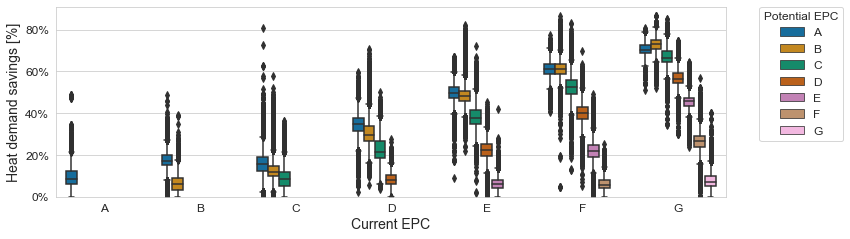

In [35]:
epc_df = current_dataset[epc_rating_cols].unstack().reset_index()
epc_df.drop("level_1", axis=1, inplace=True)
epc_df.columns =["EPC", "Heat demand savings [%]"]
epc_df["Target EPC"] = epc_df["EPC"].str[-1]
epc_df["Current EPC"] = epc_df["EPC"].str[11]
to_drop = epc_df.loc[epc_df["Heat demand savings [%]"]>0, :].index #there is a decrease of the energy efficient of the building with the increase of the epc
epc_df.drop(to_drop, inplace=True)
epc_df["Heat demand savings [%]"]= - epc_df["Heat demand savings [%]"] # transform heat demand changes into heat demand savings

f, ax = plt.subplots(figsize=figsize)
sns.boxplot(x="Current EPC", y="Heat demand savings [%]", hue="Target EPC", data=epc_df.dropna())
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}%'.format(x*100)))
ax.legend(title="Potential EPC", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_ylim(0, None)

In [36]:
epc_df.dropna().groupby(["Current EPC", "Target EPC"]).median().to_csv(path_save_paper+os.path.sep+"heat_demand_savings_EPC_rating.csv")

## Visualisation

In [37]:
path_map =  r"D:\OneDrive - Cardiff University\04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data\GIS map and data"
file = "UK_2011_LSOA_Heat_Map.geojson"
path_map = path_map+os.path.sep+file

In [38]:
def create_map_LA(df, target, path_map, fig, ax, cmap=None, percentage_scale=False):
    
    map_df = gpd.read_file(path_map)
    map_df.crs = {'init': 'epsg:4326'}

    map_df = pd.merge(map_df, df[["Local Authority (2019)", target]], left_on="lad19nm", right_on="Local Authority (2019)", how="left")
    map_df = map_df.dropna(subset=[target])
    # create figure and axes for Matplotlib
    if percentage_scale:
        vmin = 0
        vmax = 1
    else:
        vmin=0
        vmax=map_df[target].max()

    
    ax.axis('off')
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    
    map_df = map_df.to_crs({'init': 'epsg:3395'}) # mercator projections
    
    if cmap==None:
        cmap='Blues'
        
    map_df.plot(column=target, cmap=cmap, linewidth=0.01, ax=ax,  edgecolor='black', vmin=vmin, vmax=vmax) #,

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    
    plt.close()
    return cbar


In [39]:
def create_map(df, target, path_map, fig, ax, cmap=None, percentage_scale=False):
    
    map_df = gpd.read_file(path_map)
    map_df.crs = {'init': 'epsg:4326'}
    
    map_df = pd.merge(map_df, df[['LSOA11CD', target]], left_on="GeographyCode", right_on="LSOA11CD", how="left")
    map_df = map_df.dropna(subset=[target])
    # create figure and axes for Matplotlib
    if percentage_scale:
        vmin = 0
        vmax = 1
    else:
        vmin=0
        vmax=41

    
    ax.axis('off')
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    
    map_df = map_df.to_crs({'init': 'epsg:3395'}) # mercator projections
    
    if cmap==None:
        cmap='Blues'
        
    map_df.plot(column=target, cmap=cmap, linewidth=0.01, ax=ax,  edgecolor='black', vmin=vmin, vmax=vmax) #,

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    
    plt.close()
    return cbar


C:\Users\sceac10\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


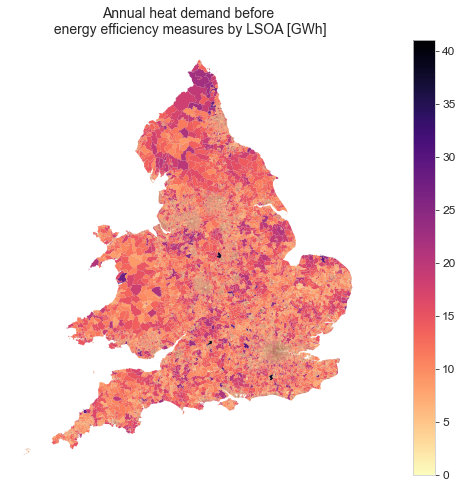

In [40]:
target = "Total heat demand before energy efficiency measures 2018 (kWh)"
current_dataset[target] = current_dataset[target]/1000000
f, ax = plt.subplots(figsize=figsize_map)

cmap_1 = 'magma_r'

cbar = create_map(current_dataset[['LSOA11CD', target]], target, path_map, f, ax, cmap=cmap_1, percentage_scale=False)
ax.set_title("Annual heat demand before\n energy efficiency measures by LSOA [GWh]", fontsize= font_size+2)
f.savefig(path_save_paper+os.path.sep+"Annual_heat_demand_before_EE."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

f

C:\Users\sceac10\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


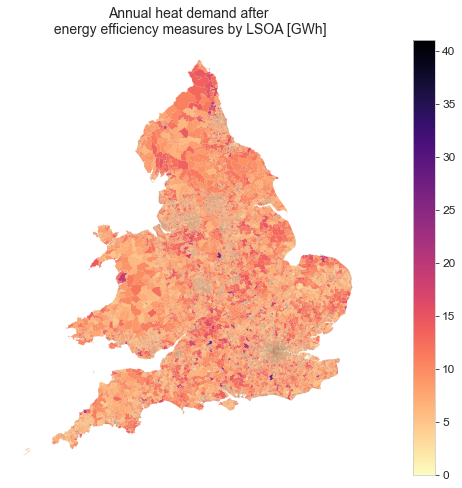

In [41]:
target = "Total heat demand after energy efficiency measures 2018 (kWh)"
current_dataset[target] = current_dataset[target]/1000000
f, ax = plt.subplots(figsize=figsize_map)

cmap_1 = 'magma_r'
cbar = create_map(current_dataset[['LSOA11CD', target]], target, path_map, f, ax, cmap=cmap_1, percentage_scale=False)
ax.set_title("Annual heat demand after\n energy efficiency measures by LSOA [GWh]", fontsize= font_size+2)
f.savefig(path_save_paper+os.path.sep+"Annual_heat_demand_after_EE."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)
f

## EPC costs
Notes : Other potential datasets that could be added to the database in the future: EPC, ownership (social housing may be easier to decarbonise as it can be done in bulk, etc.)

In [42]:
list_LAs = {c.lower().replace(" ", "").replace("-", "").replace("'", "").replace(".", ""):c for c in current_dataset["Local Authority (2011)"].unique()}
list_LAs

{'cityoflondon': 'City of London',
 'barkinganddagenham': 'Barking and Dagenham',
 'barnet': 'Barnet',
 'bexley': 'Bexley',
 'brent': 'Brent',
 'bromley': 'Bromley',
 'camden': 'Camden',
 'croydon': 'Croydon',
 'ealing': 'Ealing',
 'enfield': 'Enfield',
 'greenwich': 'Greenwich',
 'hackney': 'Hackney',
 'hammersmithandfulham': 'Hammersmith and Fulham',
 'haringey': 'Haringey',
 'harrow': 'Harrow',
 'havering': 'Havering',
 'hillingdon': 'Hillingdon',
 'hounslow': 'Hounslow',
 'islington': 'Islington',
 'kensingtonandchelsea': 'Kensington and Chelsea',
 'kingstonuponthames': 'Kingston upon Thames',
 'lambeth': 'Lambeth',
 'lewisham': 'Lewisham',
 'merton': 'Merton',
 'newham': 'Newham',
 'redbridge': 'Redbridge',
 'richmonduponthames': 'Richmond upon Thames',
 'southwark': 'Southwark',
 'sutton': 'Sutton',
 'towerhamlets': 'Tower Hamlets',
 'walthamforest': 'Waltham Forest',
 'wandsworth': 'Wandsworth',
 'westminster': 'Westminster',
 'bolton': 'Bolton',
 'bury': 'Bury',
 'manchester': 

In [43]:
EPC_costs_columns = ['Average energy efficiency improvements costs of detached gas boiler [£]',
           'Average energy efficiency improvements costs of detached oil boiler [£]',
           'Average energy efficiency improvements costs of detached resistance heating [£]',
           'Average energy efficiency improvements costs of detached solid fuel boiler [£]',
           'Average energy efficiency improvements costs of flat gas boiler [£]',
           'Average energy efficiency improvements costs of flat oil boiler [£]',
           'Average energy efficiency improvements costs of flat resistance heating [£]',
           'Average energy efficiency improvements costs of flat solid fuel boiler [£]',
           'Average energy efficiency improvements costs of semi-detached gas boiler [£]',
           'Average energy efficiency improvements costs of semi-detached oil boiler [£]',
           'Average energy efficiency improvements costs of semi-detached resistance heating [£]',
           'Average energy efficiency improvements costs of semi-detached solid fuel boiler [£]',
           'Average energy efficiency improvements costs of terraced gas boiler [£]',
           'Average energy efficiency improvements costs of terraced oil boiler [£]',
           'Average energy efficiency improvements costs of terraced resistance heating [£]',
           'Average energy efficiency improvements costs of terraced solid fuel boiler [£]']

EPC_df = pd.DataFrame(index=EPC_costs_columns)


In [44]:
epc_path = r"D:\OneDrive - Cardiff University\04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data\Domestic_EPC_results\EPC_costs"
total_number_epcs = 0

for fn in os.listdir(epc_path):
    LA = fn.split("_")[0].lower()
    
    if LA in list_LAs.keys():
        org_LA_name = list_LAs[LA]
        epc_cost_LA = pd.read_csv(epc_path+os.path.sep+fn)
        
        total_number_epcs = total_number_epcs + epc_cost_LA["Number of EPCs"].sum()
        
        epc_cost_LA["Key"] = epc_cost_LA["Key"].str.lower()
        epc_cost_LA.set_index("Key", inplace=True)
        epc_cost_LA = epc_cost_LA["Average costs [£]"].to_frame().T
        epc_cost_LA.index = [org_LA_name]
        cols_to_keep = [c for c in epc_cost_LA.columns if "heat pump" not in c]
        epc_cost_LA = epc_cost_LA[cols_to_keep]
        epc_cost_LA.columns = ["Average energy efficiency improvements costs of "+c + " [£]" for c in epc_cost_LA.columns]
        EPC_df = pd.merge(EPC_df, epc_cost_LA.T, left_index=True, right_index=True, how="left")
    else:
        print(LA, "This LA has not been found in the list")

EPC_df = EPC_df.T
EPC_df.fillna(EPC_df.mean(), inplace=True)
## Change the classification from using local authority 2011 to local authority 2019
EPC_df.index.name = "Local Authority (2019)"
EPC_df.reset_index(inplace=True)
EPC_df.replace({"Local Authority (2019)":LA_lookup_dict}, inplace=True)
EPC_df = EPC_df.groupby("Local Authority (2019)").mean()

print("Total number EPCs", total_number_epcs)

unknownlocalauthority This LA has not been found in the list
Total number EPCs 9642936


In [45]:
number_cols = []
for c in current_categories:
    number_cols.append("Number of "+c.lower()+" in 2018")

In [46]:
EPC_df = pd.merge(EPC_df, current_dataset.groupby("Local Authority (2019)").sum()[number_cols], left_index=True, right_index=True, how="left")
EPC_df.columns = [c.replace("solid fuel", "biomass") for c in EPC_df.columns] 

In [47]:
EPC_df["Total energy efficiency improvements costs [£]"]=0
cols_to_plot = []
number_dwellings = 0
for c in current_categories:
    c = c.lower()
    cost_col = "Average energy efficiency improvements costs of "+c + " [£]"
    cols_to_plot.append(cost_col)
    number_col = "Number of "+c+" in 2018"
    number_dwellings = number_dwellings + EPC_df[number_col]
    EPC_df["Total energy efficiency improvements costs [£]"] = EPC_df["Total energy efficiency improvements costs [£]"] +EPC_df[cost_col]*EPC_df[number_col]
    
print("Total number of dwellings:", number_dwellings.sum())

Total number of dwellings: 23403209.0


In [48]:
EPC_df["Total energy efficiency improvements costs [£]"]

Local Authority (2019)
Adur            8.378166e+07
Allerdale       1.336438e+08
Amber Valley    1.796371e+08
Arun            2.354119e+08
Ashfield        1.711113e+08
                    ...     
Wychavon        1.901431e+08
Wycombe         2.328351e+08
Wyre            1.614431e+08
Wyre Forest     1.469314e+08
York            2.481811e+08
Name: Total energy efficiency improvements costs [£], Length: 339, dtype: float64

(0.0, 26567.625)

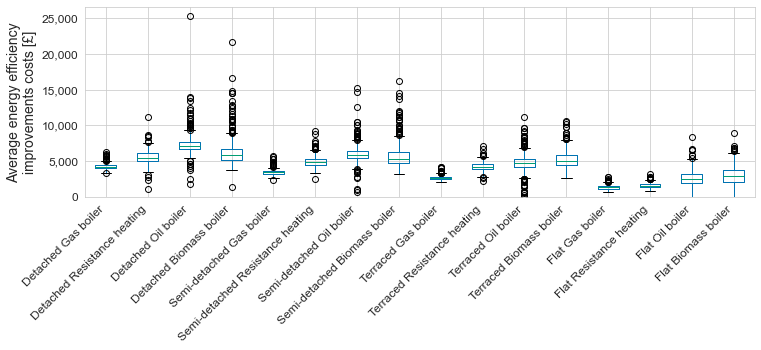

In [49]:
fig, ax = plt.subplots(figsize=(figsize[0], figsize[1]))

EPC_df[cols_to_plot].plot.box(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right' )
ax.set_ylabel("Average energy efficiency\nimprovements costs [£]")
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.set_xticklabels(current_categories)
ax.set_ylim(0, None)

In [50]:
EPC_df.columns = [c.replace("[£]", "(GBP)") for c in EPC_df.columns]
EPC_df

,Average energy efficiency improvements costs of detached gas boiler (GBP),Average energy efficiency improvements costs of detached oil boiler (GBP),Average energy efficiency improvements costs of detached resistance heating (GBP),Average energy efficiency improvements costs of detached biomass boiler (GBP),Average energy efficiency improvements costs of flat gas boiler (GBP),Average energy efficiency improvements costs of flat oil boiler (GBP),Average energy efficiency improvements costs of flat resistance heating (GBP),Average energy efficiency improvements costs of flat biomass boiler (GBP),Average energy efficiency improvements costs of semi-detached gas boiler (GBP),Average energy efficiency improvements costs of semi-detached oil boiler (GBP),...,Number of semi-detached biomass boiler in 2018,Number of terraced gas boiler in 2018,Number of terraced resistance heating in 2018,Number of terraced oil boiler in 2018,Number of terraced biomass boiler in 2018,Number of flat gas boiler in 2018,Number of flat resistance heating in 2018,Number of flat oil boiler in 2018,Number of flat biomass boiler in 2018,Total energy efficiency improvements costs (GBP)
Local Authority (2019),,,,,,,,,,,,,,,,,,,,,
Adur,4456.790123,5003.928571,6002.705357,6413.750000,1262.605331,465.000000,1689.028008,1569.583333,3719.975524,3964.416667,...,19.0,5170.0,391.0,6.0,7.0,3765.0,2054.0,11.0,20.0,8.378166e+07
Allerdale,3573.298351,6206.614907,5315.598240,5047.708333,1163.447567,2759.218750,2193.632850,5507.500000,2895.881560,5184.745011,...,476.0,11751.0,690.0,401.0,373.0,2742.0,929.0,65.0,24.0,1.336438e+08
Amber Valley,4015.229686,7064.162198,5589.587678,5390.514706,1183.922717,2917.500000,1531.923486,5267.500000,3149.135264,5740.322917,...,454.0,9749.0,659.0,37.0,206.0,2278.0,1042.0,17.0,14.0,1.796371e+08
Arun,4426.761764,7437.264706,5720.811897,5967.315789,1444.144030,1725.714286,1752.052105,2517.931034,3685.015635,6308.166667,...,76.0,12936.0,757.0,38.0,55.0,9327.0,5914.0,44.0,18.0,2.354119e+08
Ashfield,3932.017304,6712.797619,5821.296875,5885.916667,1140.336687,2581.267159,1131.571012,3773.000000,3260.179038,4802.110000,...,672.0,9546.0,443.0,15.0,267.0,3051.0,941.0,37.0,22.0,1.711113e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychavon,4021.218124,6955.218053,5012.635279,5814.337121,1564.475767,2871.578947,1533.586287,3579.583333,3318.377330,5814.364796,...,319.0,7290.0,786.0,304.0,129.0,3527.0,2054.0,153.0,31.0,1.901431e+08
Wycombe,4562.251199,7569.888293,4944.735484,6243.515625,907.461505,2711.071429,1662.270135,3911.500000,3433.383749,7069.960526,...,112.0,10154.0,696.0,160.0,48.0,7838.0,5118.0,113.0,19.0,2.328351e+08
Wyre,3941.020199,6545.709256,5274.235294,4980.234375,1727.301301,3093.888889,1558.186070,2640.000000,3536.827373,5177.735602,...,136.0,7723.0,470.0,87.0,84.0,3593.0,1987.0,20.0,11.0,1.614431e+08


In [51]:
EPC_df.to_csv(path_save_paper+os.path.sep+"Energy_efficiency_improvements_costs_LA.csv", quotechar='"',quoting=csv.QUOTE_NONNUMERIC, encoding='utf-8-sig')

In [52]:
EPC_df

,Average energy efficiency improvements costs of detached gas boiler (GBP),Average energy efficiency improvements costs of detached oil boiler (GBP),Average energy efficiency improvements costs of detached resistance heating (GBP),Average energy efficiency improvements costs of detached biomass boiler (GBP),Average energy efficiency improvements costs of flat gas boiler (GBP),Average energy efficiency improvements costs of flat oil boiler (GBP),Average energy efficiency improvements costs of flat resistance heating (GBP),Average energy efficiency improvements costs of flat biomass boiler (GBP),Average energy efficiency improvements costs of semi-detached gas boiler (GBP),Average energy efficiency improvements costs of semi-detached oil boiler (GBP),...,Number of semi-detached biomass boiler in 2018,Number of terraced gas boiler in 2018,Number of terraced resistance heating in 2018,Number of terraced oil boiler in 2018,Number of terraced biomass boiler in 2018,Number of flat gas boiler in 2018,Number of flat resistance heating in 2018,Number of flat oil boiler in 2018,Number of flat biomass boiler in 2018,Total energy efficiency improvements costs (GBP)
Local Authority (2019),,,,,,,,,,,,,,,,,,,,,
Adur,4456.790123,5003.928571,6002.705357,6413.750000,1262.605331,465.000000,1689.028008,1569.583333,3719.975524,3964.416667,...,19.0,5170.0,391.0,6.0,7.0,3765.0,2054.0,11.0,20.0,8.378166e+07
Allerdale,3573.298351,6206.614907,5315.598240,5047.708333,1163.447567,2759.218750,2193.632850,5507.500000,2895.881560,5184.745011,...,476.0,11751.0,690.0,401.0,373.0,2742.0,929.0,65.0,24.0,1.336438e+08
Amber Valley,4015.229686,7064.162198,5589.587678,5390.514706,1183.922717,2917.500000,1531.923486,5267.500000,3149.135264,5740.322917,...,454.0,9749.0,659.0,37.0,206.0,2278.0,1042.0,17.0,14.0,1.796371e+08
Arun,4426.761764,7437.264706,5720.811897,5967.315789,1444.144030,1725.714286,1752.052105,2517.931034,3685.015635,6308.166667,...,76.0,12936.0,757.0,38.0,55.0,9327.0,5914.0,44.0,18.0,2.354119e+08
Ashfield,3932.017304,6712.797619,5821.296875,5885.916667,1140.336687,2581.267159,1131.571012,3773.000000,3260.179038,4802.110000,...,672.0,9546.0,443.0,15.0,267.0,3051.0,941.0,37.0,22.0,1.711113e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychavon,4021.218124,6955.218053,5012.635279,5814.337121,1564.475767,2871.578947,1533.586287,3579.583333,3318.377330,5814.364796,...,319.0,7290.0,786.0,304.0,129.0,3527.0,2054.0,153.0,31.0,1.901431e+08
Wycombe,4562.251199,7569.888293,4944.735484,6243.515625,907.461505,2711.071429,1662.270135,3911.500000,3433.383749,7069.960526,...,112.0,10154.0,696.0,160.0,48.0,7838.0,5118.0,113.0,19.0,2.328351e+08
Wyre,3941.020199,6545.709256,5274.235294,4980.234375,1727.301301,3093.888889,1558.186070,2640.000000,3536.827373,5177.735602,...,136.0,7723.0,470.0,87.0,84.0,3593.0,1987.0,20.0,11.0,1.614431e+08


In [53]:
path_map =  r"D:\OneDrive - Cardiff University\04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data\GIS map and data"
file = "Local_authority_UK_2019.geojson"
path_map = path_map+os.path.sep+file

In [54]:
target = "Total energy efficiency improvements costs (GBP)"
EPC_df.reset_index(inplace=True)
EPC_df[target] = EPC_df[target]/1000000

C:\Users\sceac10\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


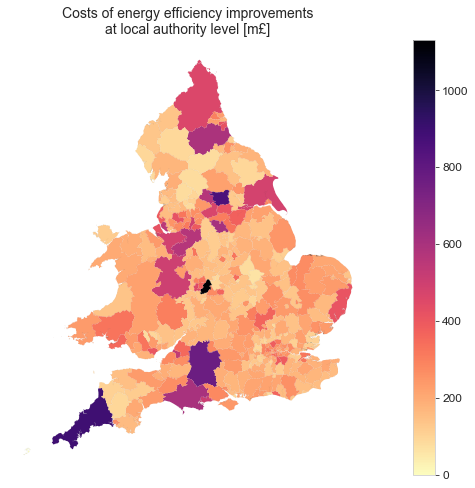

In [55]:



f, ax = plt.subplots(figsize=figsize_map)

cmap_1 = 'magma_r'
cbar = create_map_LA(EPC_df[['Local Authority (2019)', target]], target, path_map, f, ax, cmap=cmap_1, percentage_scale=False)
ax.set_title("Costs of energy efficiency improvements\nat local authority level [m£]", fontsize= font_size+2)
# f.savefig(path_save_paper+os.path.sep+"Annual_heat_demand_after_EE."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)
f

#### Heat demand validation

In [56]:
def display_histogram(xlabel="", ylabel=""):
    fig, ax = plt.subplots(figsize=(figsize))
    ax.yaxis.grid(True)
    if xlabel != "":
        ax.set_xlabel(xlabel)
    if ylabel != "":
        ax.set_ylabel(ylabel)
    ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.close()
    return fig,ax

In [57]:
def get_mean_95quantile(df, target):
    upper_bound = df[target].quantile(0.975)
    lower_bound = df[target].quantile(0.025)
    return df.loc[(df[target]<upper_bound) & (df[target]>lower_bound), target].median()


from matplotlib.offsetbox import AnchoredText

from matplotlib.offsetbox import AnchoredText

def heat_comparison_2(dataset, fig=None, ax=None):
    
    colors= []
    for i in reversed(sns.color_palette()[0:3]):
        colors.append(i)

    if fig==None and ax==None:
        fig, ax = plt.subplots(figsize=figsize)
    
    markers = ['^', 'o', '+', 's', 'd']
    #First graph
    x = list(dataset.index.values)
    
    heat_from_gas_cols = ['Heat from gas 2018 (kWh)', 'Heat from gas 2018 (kWh) - method 2' ]
    labels = ['Heat from gas (GWh) - EPC based method','Heat from gas 2011 (GWh) - BEIS',  'Heat from gas 2018 (GWh) - BEIS']
    labels = ['Heat from gas (GWh) - EPC based method', 'Heat from gas 2018 (GWh) - BEIS']

    for ii,c in enumerate(heat_from_gas_cols):

        y = list(dataset[c].values/1000000)
        ax.scatter(x, y, marker = markers[ii], label=labels[ii], color=colors[ii])
    #     dataset.loc[:, heat_from_gas_cols].plot.scatter(ax=ax1)


    ax.set_ylabel("Heat from gas (GWh)")
    ax.set_xlabel("LSOA index")
    ax.margins(0,0)

    ax.legend(facecolor = 'white', framealpha=1, frameon=True, loc=2)
    return fig, ax
# fig.savefig(path_save_figures+os.path.sep+"Gas_validation_Data_NPT."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [58]:
current_dataset["Difference with 2018 data"] = (current_dataset['Heat from gas 2018 (kWh) - method 2'] - current_dataset['Heat from gas 2018 (kWh)'])/current_dataset['Heat from gas 2018 (kWh)']
current_dataset["Difference with 2018 data"] = current_dataset["Difference with 2018 data"]
# full_dataset.loc[full_dataset['Heat from gas 2016 (kWh) - method 2']==0 ,"Error for 2016 data"]=0
avg_diff_2016 = get_mean_95quantile(current_dataset, "Difference with 2018 data")
current_dataset["Difference with 2011 data"] = (current_dataset['Heat from gas 2011 (kWh) - method 2'] - current_dataset['Heat from gas 2018 (kWh)'])/current_dataset['Heat from gas 2018 (kWh)']
current_dataset["Difference with 2011 data"] = current_dataset["Difference with 2011 data"]
# full_dataset.loc[full_dataset['Heat from gas 2011 (kWh) - method 2']==0 ,"Error for 2011 data"]=0
avg_diff_2011 = get_mean_95quantile(current_dataset, "Difference with 2011 data")
print(avg_diff_2016)
print(avg_diff_2011)

-0.18499981595824697
-0.16744284248079


In [59]:
path_archetypes= computer_path + r"\OneDrive - Cardiff University\04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data\Heat data"
file_archetype = "Archetypes_data_tables_2014.xlsx"

In [60]:
archetypes_df = pd.read_excel(path_archetypes+os.path.sep+file_archetype, sheet_name = "archetypes", header=1, usecols=[0,1,2,3,4])[:9]
archetypes_df.fillna(method="ffill", inplace=True)
archetypes_df.columns = [c.strip() for c in archetypes_df.columns]
archetypes_df["Fuel"] = archetypes_df["Fuel"].str.strip()
archetypes_df

,Population,Fuel,Count of HHs,Mean,Median
0,All GB Households,Electricity,25118129,4217,3792
1,Gas Heated HHs only,Electricity,20879515,3738,3563
2,Gas Heated HHs only,Gas,20879515,15911,15654
3,Gas Heated HHs only,Total Gas + Electricity,20879515,19649,19320
4,Electrically Heated HHs only,Power,2603573,1472,1307
5,Electrically Heated HHs only,Heat,2603573,6508,4978
6,Electrically Heated HHs only,Total Electricity,2603573,7981,6229
7,Non-Metered Fuel Heated HHs only,Electricity,1635042,4334,4291
8,Non-Metered Fuel Heated HHs only,Heat (non-metered fuels),1635042,21763,20988


In [61]:
final_archetypes= {}
final_archetypes["Gas heated dwellings"] = archetypes_df.loc[(archetypes_df["Population"]=='Gas Heated HHs only') & (archetypes_df["Fuel"]=="Gas"), "Mean"].values[0]
final_archetypes["Electrically heated dwellings"] = archetypes_df.loc[(archetypes_df["Population"]=='Electrically Heated HHs only') & (archetypes_df["Fuel"]=="Heat"), "Mean"].values[0]
final_archetypes["Non-metered heated dwellings"] = archetypes_df.loc[(archetypes_df["Population"]=='Non-Metered Fuel Heated HHs only') & (archetypes_df["Fuel"]=="Heat (non-metered fuels)"), "Mean"].values[0]
df_comparison = pd.DataFrame.from_dict(final_archetypes, orient='index', columns=["CSE"])
df_comparison

,CSE
Gas heated dwellings,15911
Electrically heated dwellings,6508
Non-metered heated dwellings,21763


In [62]:
mean_demand_col = [c for c in current_dataset.columns if "Average heat demand before energy efficiency measures for" in c]

In [63]:
gas_cols = [x for x in mean_demand_col if "gas" in x]
elec_cols = [x for x in mean_demand_col if "resistance" in x]
non_metered_cols = [x for x in mean_demand_col if ("oil" in x) | ("biomass" in x)]
non_metered_cols = [x for x in non_metered_cols if ("detached" in x)]

In [64]:
df_comparison["EPC based method"]=0
df_comparison.loc["Gas heated dwellings", "EPC based method"] = current_dataset[gas_cols].mean().mean()
df_comparison.loc["Electrically heated dwellings", "EPC based method"] = current_dataset[elec_cols].mean().mean()
df_comparison.loc["Non-metered heated dwellings", "EPC based method"] = current_dataset[non_metered_cols].mean().mean()

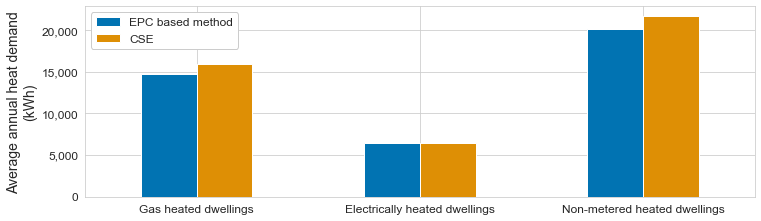

In [65]:
fig, ax = display_histogram(ylabel="Average annual heat demand\n(kWh)")
df_comparison[["EPC based method", "CSE"]].plot.bar(ax=ax, rot=0, fontsize=font_size, color=sns.color_palette())
ax.legend(facecolor = 'white', framealpha=1, frameon=True)
fig.savefig(path_save_paper+os.path.sep+"DwellingCat_validation_Data."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)
fig

In [66]:
df_comparison
(21763-20111.780615)/20111.780615

0.08210209809908471

Local Authority (2011)
Cardiff   -0.198344
Newport   -0.260219
Swansea   -0.258876
Name: Difference with 2018 data, dtype: float64

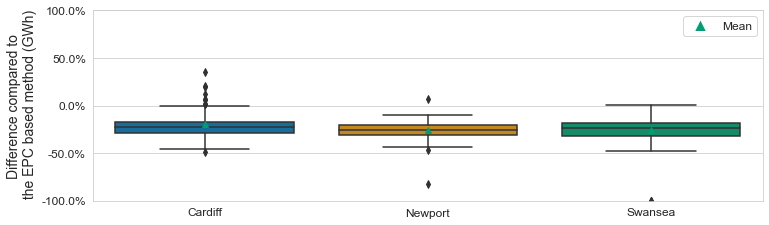

In [67]:
from matplotlib.lines import Line2D

temp_df = current_dataset.loc[current_dataset["Local Authority (2011)"].isin(["Cardiff", "Swansea", "Newport"]), :].copy()
temp_df.sort_values("Local Authority (2011)", inplace=True)
fig, ax = plt.subplots(figsize=figsize)

sns.boxplot(x="Local Authority (2011)", y="Difference with 2018 data", data=temp_df, ax=ax, showmeans=True)

handles, labels = ax.get_legend_handles_labels()

ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.1f}%'.format(x*100)))
ax.set_ylim(-1,1)
ax.set_ylabel("Difference compared to\n the EPC based method (GWh)")
ax.set_xlabel("")

legend_elements = [Line2D([0], [0], marker='^', color='w', label='Mean',
                          markerfacecolor=sns.color_palette()[2], markersize=12)]
plt.legend(handles=legend_elements)

fig.savefig(path_save_paper+os.path.sep+"Gas_error_plot."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

temp_df.groupby(["Local Authority (2011)"]).mean()["Difference with 2018 data"]

Cardiff
Swansea
Newport


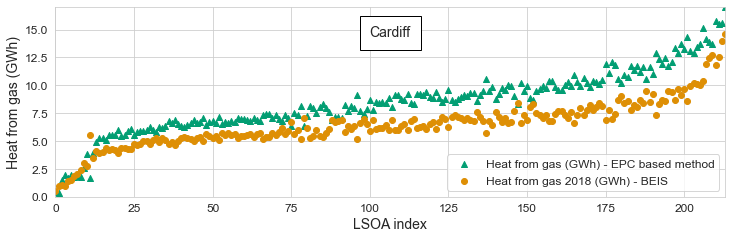

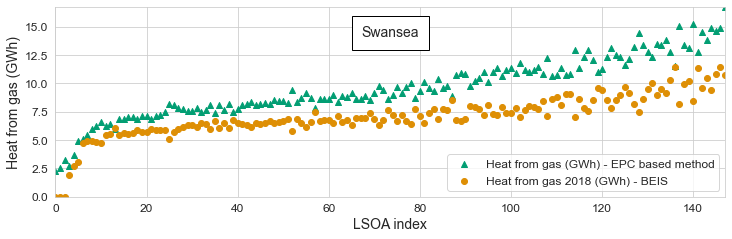

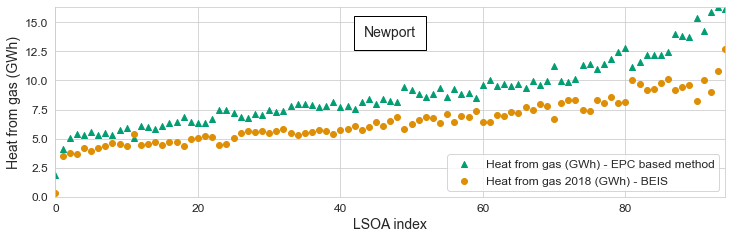

In [68]:

heat_from_gas_cols = ['Heat from gas 2018 (kWh)', 'Heat from gas 2018 (kWh) - method 2' ]
for LA in ["Cardiff", "Swansea", "Newport"]:
    print(LA)
    df = current_dataset.loc[current_dataset["Local Authority (2011)"]==LA, :].copy()
    index_to_drop = df[df[heat_from_gas_cols].sum(axis=1)==0].index
    df.drop(index_to_drop, inplace=True)
    sorted_index = df[heat_from_gas_cols].sum(axis=1).sort_values().index
    df = df.loc[sorted_index, :].reset_index(drop=True)
    
    f, ax = heat_comparison_2(df)
    
    
    ax.text(0.5, 0.90,LA, horizontalalignment='center',  verticalalignment='top', fontsize=font_size+2,  transform = ax.transAxes, bbox={'facecolor': 'white', 'edgecolor':'black', 'alpha': 1, 'pad': 10})
    ax.legend(loc=4)
    ax.set_ylim(0, None)
    f.savefig(path_save_paper+os.path.sep+"Gas_comparison_plot_"+LA+"."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

## Timeseries dataset
the ASHPs and GSHps are designed for a -3.2C OAT

In [69]:
# def get_temperature_and_correction_factor(LA, target_year, Flag_1_in_20):
    
#     temperature_path =  r"D:\OneDrive - Cardiff University\04 - Projects\01 - Flexis\04 - Data\06 - Generation data UK\UK data\Temperature"
    
#     temperature_df = pd.DataFrame()

#     file = ######## #Choose to use Recent Year (2018) temperature or reference year (2009)

#     # Import temperature data
#     temp_profile_LA = pd.read_csv(temperature_path+os.path.sep+file, index_col=0, parse_dates=True) ## Temperature profiles
#     temp_profile_LA = temp_profile_LA.resample('1d').mean()
#     temp_profile_LA.columns = ["Temperature"]

#     temperature_df["Temperature"] = temp_profile_LA["Temperature"].values

#     # Prepare temperature data
#     temperature_df.index = temp_profile_LA.index
#     temperature_df.index = temperature_df.index + pd.offsets.DateOffset(years=target_year-reference_year)# Converting 2009 temperature profile to 2050
#     addTimePeriod(temperature_df)
#     if Flag_1_in_20:
#         if reference_year == 2018:
#             temperature_df.loc[(temperature_df.index.dayofweek==3) & (temperature_df.index.week==9), "Temperature"]=coldest_temperature
# #                             temperature_df.loc[(temperature_df.index.week==9), "Temperature"]=coldest_temperature

#         else:
# #                         min_temp = temp_profile_LA["Temperature"].min()
#             temperature_df.loc[(temperature_df.index.dayofweek==2) & (temperature_df.index.week==2), "Temperature"]=coldest_temperature
# #                             temperature_df.loc[(temperature_df.index.week==2), "Temperature"]=coldest_temperature

#     print("Calculate correction factor...")
#     # Calculate the correction factor based on degree days
#     nb_degree_days_SAP_Wales = get_nb_degree_days(temperatures_month_Wales, reference_year)
#     correction_factor = 1+(get_nb_degree_days(temperature_df["Temperature"].resample('1m').mean().values.ravel(), reference_year)-nb_degree_days_SAP_Wales)/nb_degree_days_SAP_Wales
#     print(correction_factor, nb_degree_days_SAP_Wales, get_nb_degree_days(temperature_df["Temperature"].resample('1m').mean().values.ravel(), reference_year))

#     temperature_df.index.name = "index"
#     temperature_df.reset_index(inplace=True)
#     if calendar.isleap(target_year):
#         temperature_df.loc[temperature_df["Month"]>2, "Day"] = temperature_df.loc[temperature_df["Month"]>2, "Day"]-1 # remove one day to the count
#     temperature_df['Date'] = pd.to_datetime(temperature_df['Date']) 
    
#     return temperature_df, correction_factor

In [70]:
path_temperature =  r"D:\OneDrive - Cardiff University\04 - Projects\01 - Flexis\04 - Data\06 - Generation data UK\UK data\Temperature\\"

In [71]:
temperature = functions.ExtractAndMerge(path_temperature)
temperature.reset_index(inplace=True)
temperature.drop(["level_0", "level_3", "HDR", "TEMPERATURE DATA"], axis=1, inplace=True)
temperature.columns=["Date", "Temperature"]
temperature.dropna(how="any", inplace=True)
temperature["Date"]= pd.to_datetime(temperature["Date"], format="%Y%m%d")
temperature.set_index("Date", inplace=True)
temperature.sort_index(axis=0, inplace=True)
temperature.interpolate(inplace=True)
temperature = temperature[~temperature.index.duplicated(keep='first')]
temperature.shape

Temperature UK 2012.csv
Temperature UK 2012.csv
Temperature UK 2013 2.csv
Temperature UK 2013 2.csv
Temperature UK 2013.csv
Temperature UK 2013.csv
Temperature UK 2014 2.csv
Temperature UK 2014 2.csv
Temperature UK 2014.csv
Temperature UK 2014.csv
Temperature UK 2015 2.csv
Temperature UK 2015 2.csv
Temperature UK 2015.csv
Temperature UK 2015.csv
Temperature UK 2016 2.csv
Temperature UK 2016 2.csv
Temperature UK 2016.csv
Temperature UK 2016.csv
Temperature UK 2017 2.csv
Temperature UK 2017 2.csv
Temperature UK 2017 3.csv
Temperature UK 2017 3.csv
Temperature UK 2017.csv
Temperature UK 2017.csv
Temperature UK 2018 2.csv
Temperature UK 2018 2.csv
Temperature UK 2018 3.csv
Temperature UK 2018 3.csv
Temperature UK 2018.csv
Temperature UK 2018.csv


(2242, 1)

In [72]:
functions.addTimePeriod(temperature)

D:\OneDrive - Cardiff University/05 - Python/01 - Packages/Functions\functions.py:31: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data["Week"] = data.index.week


In [73]:
# from sap 2012
temperatures_month_UK = [4.3, 4.9, 6.5, 8.9, 11.7, 14.6, 16.6, 16.4, 14.1, 10.6, 7.1, 4.2]
temperatures_month_Wales = [5, 5.3, 6.5, 8.5, 11.2, 13.7, 15.3, 15.3, 13.5, 10.7, 7.8, 5.2]
base_temperature = 15.5

print("SAP degree days:", pr.get_nb_degree_days(temperatures_month_UK, 2009))

for year in temperature["Year"].unique():
    
    list_temperature = temperature.loc[temperature["Year"]==year, :].resample('1m').mean()["Temperature"].to_list()
    print(year, len(temperature.loc[temperature["Year"]==year, :]))
    print("Degree days:", pr.get_nb_degree_days(list_temperature, 2010))
temperature["Date"] = temperature.index
temperature.index.name = "index"

SAP degree days: 2062.0
2012 52
Degree days: 518.8253456221198
2013 364
Degree days: 1982.0000000000002
2014 365
Degree days: 1485.1000000000004
2015 365
Degree days: 1627.2999999999997
2016 366
Degree days: 1721.3862068965518
2017 365
Degree days: 1574.7
2018 365
Degree days: 1687.0


In [74]:
temperature.groupby(["Year", "Month"]).count().loc[2013, :]

,Temperature,Hour,DayOfWeek,Day,Weekday,HH,Date,Week,Season,Season num
Month,,,,,,,,,,
1,31,31,31,31,31,31,31,31,31,31
2,28,28,28,28,28,28,28,28,28,28
3,31,31,31,31,31,31,31,31,31,31
4,30,30,30,30,30,30,30,30,30,30
5,31,31,31,31,31,31,31,31,31,31
6,30,30,30,30,30,30,30,30,30,30
7,30,30,30,30,30,30,30,30,30,30
8,31,31,31,31,31,31,31,31,31,31
9,30,30,30,30,30,30,30,30,30,30


In [75]:
target_year = 2013
temperature_df = temperature.loc[temperature["Year"]==target_year, ["Temperature",  "Date"]].copy()

In [76]:
synthesized_df = pr.get_skeleton_df(target_year)
synthesized_df = pd.merge(synthesized_df, temperature_df , left_on="Date", right_on="Date", how="left")
synthesized_df["Temperature"] = synthesized_df["Temperature"].fillna(method="ffill")
synthesized_df.set_index("index", inplace=True, drop=True)
print("Calculate correction factor...")
# Calculate the correction factor based on heating degree days
nb_degree_days_SAP_UK = pr.get_nb_degree_days(temperatures_month_UK, target_year)
correction_factor = 1+(pr.get_nb_degree_days(synthesized_df["Temperature"].resample('1m').mean().values.ravel(), target_year)-nb_degree_days_SAP_UK)/nb_degree_days_SAP_UK
print(correction_factor, nb_degree_days_SAP_UK, pr.get_nb_degree_days(synthesized_df["Temperature"] .resample('1m').mean().values.ravel(), target_year))
print(synthesized_df.shape)
# synthesized_df.dropna(inplace=True)
synthesized_df.reset_index(inplace=True)
synthesized_df = pr.add_technology_profiles(synthesized_df)
synthesized_df.set_index("index", inplace=True, drop=True)

D:\OneDrive - Cardiff University/05 - Python/01 - Packages/Functions\functions.py:31: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data["Week"] = data.index.week


Calculate correction factor...
0.9612027158098941 2062.0 1982.0000000000018
(17520, 22)
boiler
Quantiles_list: [0.95]
ASHP_heat
Quantiles_list: [0.95, 0.9]
resistance_heater
Quantiles_list: [0.9]
GSHP_heat
Quantiles_list: [0.9]
LargeHP_heat
Quantiles_list: [0.9]
ASHP_elec
Quantiles_list: [0.95, 0.9]
GSHP_elec
Quantiles_list: [0.9]
LargeHP_elec
Quantiles_list: [0.9]


In [77]:
synthesized_df["Gas_boiler_heat"] = synthesized_df["boiler"]
synthesized_df["Gas_boiler_gas"] = synthesized_df["boiler"]/0.84
synthesized_df["Resistance_heater_heat"] = synthesized_df["resistance_heater"]
synthesized_df["Resistance_heater_elec"] = synthesized_df["resistance_heater"]
## Normalisation
technologies_dict = {"ASHP_heat": "ASHP_elec",
                    "GSHP_heat": "GSHP_elec",
                    "Resistance_heater_heat": "Resistance_heater_elec",
                    "Gas_boiler_heat": "Gas_boiler_gas"}

cols_to_export = []
for t_heat, t_energy in technologies_dict.items():
    print(t_heat, t_energy)
    # normalisation of heat 
    synthesized_df["Normalised_"+t_heat] = synthesized_df[t_heat]/synthesized_df[t_heat].sum()*correction_factor
    # normalisation of elec
    synthesized_df["Normalised_"+t_energy] = synthesized_df[t_energy]/synthesized_df[t_heat].sum()*correction_factor
    
    cols_to_export.append("Normalised_"+t_heat)
    cols_to_export.append("Normalised_"+t_energy)

ASHP_heat ASHP_elec
GSHP_heat GSHP_elec
Resistance_heater_heat Resistance_heater_elec
Gas_boiler_heat Gas_boiler_gas


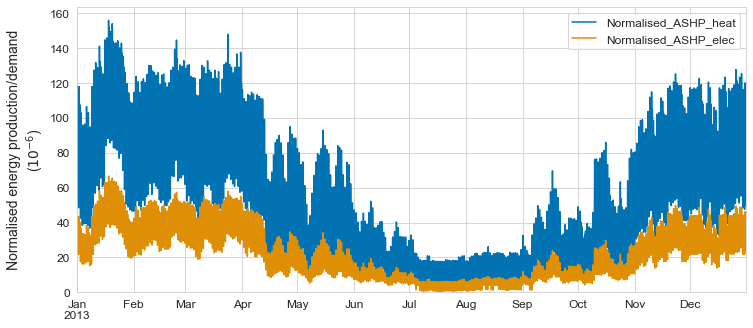

In [78]:
fig, ax = plt.subplots(figsize=(figsize[0], figsize[1]*1.5))
(synthesized_df[["Normalised_ASHP_heat", "Normalised_ASHP_elec"]]*1000000).plot(ax=ax)
ax.set_ylabel("Normalised energy production/demand\n($10^{-6}$)")

# Set the locator
# locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
# fmt = mdates.DateFormatter('%b')

ax.set_xlabel("")

# ax.xaxis.set_major_locator(locator)
# # Specify formatter
# ax.xaxis.set_major_formatter(fmt)

ax.margins(0, None)
ax.set_ylim(0, None)
fig.savefig(path_save_paper+os.path.sep+"Normalised_ASHP_profiles."+fig_format, bbox_inches='tight', format=fig_format, dpi=dpi)

In [79]:
synthesized_df[cols_to_export].head()

,Normalised_ASHP_heat,Normalised_ASHP_elec,Normalised_GSHP_heat,Normalised_GSHP_elec,Normalised_Resistance_heater_heat,Normalised_Resistance_heater_elec,Normalised_Gas_boiler_heat,Normalised_Gas_boiler_gas
index,,,,,,,,
2013-01-01 00:00:00,0.000052,0.000022,0.000063,0.000024,0.000053,0.000053,0.000020,0.000023
2013-01-01 00:30:00,0.000052,0.000022,0.000063,0.000024,0.000090,0.000090,0.000018,0.000021
2013-01-01 01:00:00,0.000053,0.000022,0.000065,0.000024,0.000090,0.000090,0.000017,0.000021
2013-01-01 01:30:00,0.000053,0.000022,0.000065,0.000024,0.000090,0.000090,0.000017,0.000021
2013-01-01 02:00:00,0.000057,0.000024,0.000068,0.000025,0.000090,0.000090,0.000017,0.000021


In [84]:
synthesized_df.columns

Index(['Hour', 'DayOfWeek', 'Day', 'Month', 'Year', 'Weekday', 'HH', 'Date',
       'Week', 'Season', 'Season num', 'Cos_HH', 'Sin_HH', 'Cos_Hour',
       'Sin_Hour', 'Cos_DayOfWeek', 'Sin_DayOfWeek', 'Cos_Month', 'Sin_Month',
       'Cos_Season num', 'Sin_Season num', 'Temperature', 'boiler',
       'ASHP_heat', 'resistance_heater', 'GSHP_heat', 'LargeHP_heat',
       'ASHP_elec', 'GSHP_elec', 'LargeHP_elec', 'Heat from ASHP backup [%]',
       'Heat from GSHP backup [%]', 'Gas_boiler_heat', 'Gas_boiler_gas',
       'Resistance_heater_heat', 'Resistance_heater_elec',
       'Normalised_ASHP_heat', 'Normalised_ASHP_elec', 'Normalised_GSHP_heat',
       'Normalised_GSHP_elec', 'Normalised_Resistance_heater_heat',
       'Normalised_Resistance_heater_elec', 'Normalised_Gas_boiler_heat',
       'Normalised_Gas_boiler_gas'],
      dtype='object')

In [80]:
synthesized_df.index = synthesized_df.index.to_series().apply(dt.datetime.isoformat)

In [81]:
synthesized_df["Temperature"].describe()

count    17520.000000
mean        10.642466
std          5.658825
min         -0.800000
25%          5.900000
50%         10.600000
75%         15.000000
max         23.200000
Name: Temperature, dtype: float64

In [82]:
synthesized_df[cols_to_export].to_csv(path_save_paper+os.path.sep+"Half-hourly_profiles_of_heating_technologies.csv", quotechar='"',quoting=csv.QUOTE_NONNUMERIC, encoding='utf-8-sig')

Text(0, 0.5, 'Normalised heat production (sum of values=1)')

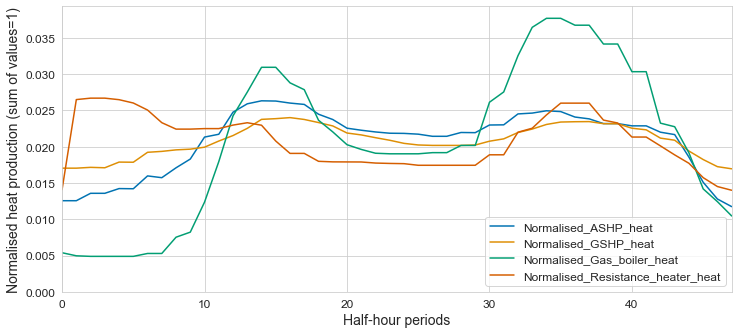

In [104]:
fig, ax = plt.subplots(figsize=(figsize[0], figsize[1]*1.5))
temp_df = synthesized_df.loc[synthesized_df["Day"]==10, ['Normalised_ASHP_heat', 'Normalised_GSHP_heat', 'Normalised_Gas_boiler_heat', 'Normalised_Resistance_heater_heat']].copy()

temp_df.reset_index(inplace=True, drop=True)
for c in temp_df.columns:
    temp_df[c] = temp_df[c]/temp_df[c].sum()

temp_df.plot(ax=ax)

ax.margins(0, None)
ax.set_xlabel("Half-hour periods")
ax.set_ylim(0, None)
ax.set_ylabel("Normalised heat production (sum of values=1)")